In [ ]:
import pandas as pd
url = "https://github.com/akashdeeps19/stacking-ensemble/blob/master/dataset.csv?raw=true"
data = pd.read_csv(url, delimiter=';')

In [ ]:
# h=96
data.head()



,Date,Consumption
0,01-01-07 00:00,28667
1,01-01-07 00:10,28204
2,01-01-07 00:20,27781
3,01-01-07 00:30,27139
4,01-01-07 00:40,26687


In [ ]:
print(len(data))

497852


In [ ]:
consumption_matrix= data.Consumption.values.tolist()


In [ ]:
len(consumption_matrix)

497852

In [ ]:
consumption_matrix[-1]

24326

In [ ]:
data.tail()

,Date,Consumption
497847,22-06-16 02:20,24550
497848,22-06-16 02:30,24228
497849,22-06-16 02:40,24543
497850,22-06-16 02:50,24239
497851,22-06-16 03:00,24326


In [ ]:
x=[]
y=[]
w=168
h=24
l = len(consumption_matrix)
for i in range(l//h): 

  if i*h+w<l and i*h+w+h<l:
    x.append(consumption_matrix[i*h:i*h+w])
    y.append(consumption_matrix[i*h+w:i*h+w+h])

In [ ]:
print(len(x) , len(y))

20736 20736


In [ ]:
print(len(x[110]) , len(y[110]))

168 24


In [ ]:
from google.colab import files
data_168 = [x_ + y_ for x_,y_ in zip(x,y)]
df = pd.DataFrame(data_168)
df.to_csv('dataset_168.csv')
files.download('dataset_168.csv')
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,28667,28204,27781,27139,26687,26333,27611,27355,27166,26848,26485,26280,25908,25577,25239,24848,24595,24276,23817,23649,23382,23084,22628,22576,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,...,25124,24825,24512,24284,23819,23667,23410,23250,23017,22891,22789,22514,22480,22292,22308,22202,22176,22166,21877,21877,21921,21656,21931,22094,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191
1,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,20023,19911,19555,19302,19122,19047,19138,19104,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,...,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191,29358,31027,31593,31469,31660,32221,32357,33081,33357,33699,34032,34746,34958,35447,35516,35654,35586,36191,35740,36005,36042,35963,36287,36063
2,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,20456,20756,21105,21251,21177,21410,21634,21843,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,...,33357,33699,34032,34746,34958,35447,35516,35654,35586,36191,35740,36005,36042,35963,36287,36063,35805,35941,35793,35919,35988,35896,35361,35551,35374,35234,34684,34325,34153,33649,33299,33465,33081,32933,32807,32715,32875,32672,32900,32828
3,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,23447,23180,22997,22819,22575,22416,22366,22232,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,...,35374,35234,34684,34325,34153,33649,33299,33465,33081,32933,32807,32715,32875,32672,32900,32828,32562,32896,32926,33004,33149,33020,33128,33524,33711,33847,34151,34675,35595,36332,36893,37413,37621,37733,37599,37501,37385,37287,37331,37086
4,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,27504,27887,27906,28141,28329,28536,28786,28952,28978,29330,29546,29658,30146,30451,30398,30566,30711,30590,30722,30581,30329,30134,30023,29623,...,33711,33847,34151,34675,35595,36332,36893,37413,37621,37733,37599,37501,37385,37287,37331,37086,37075,36995,36888,36798,36881,36748,36815,37104,36868,36745,36510,35928,35374,34872,34608,34415,34366,34372,34358,34704,34911,34351,34008,33765


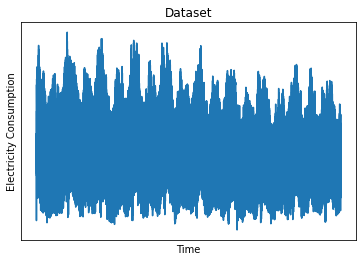

In [ ]:
import matplotlib.pyplot as plt
plt.plot(consumption_matrix)
plt.xlabel("Time")
plt.ylabel("Electricity Consumption")
plt.title("Dataset")
# plt.set_ticklabels([])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False)
plt.show()

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

# l1= consumption_matrix[1000:2000]
# l1.extend(consumption_matrix[2000:3000])
X = consumption_matrix[:100000]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -31.464335
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


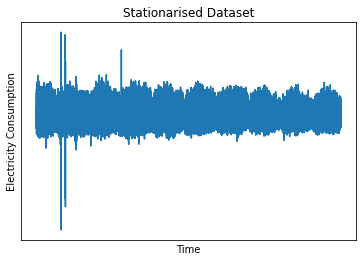

In [ ]:
stationarised_cm = [consumption_matrix[i+1]-consumption_matrix[i] for i in range(len(consumption_matrix)-1)]
plt.plot(stationarised_cm)
plt.xlabel("Time")
plt.ylabel("Electricity Consumption")
plt.title("Stationarised Dataset")
# plt.set_ticklabels([])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False)
plt.show()
plt.show()

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

# l1= consumption_matrix[1000:2000]
# l1.extend(consumption_matrix[2000:3000])
X = stationarised_cm
result = adfuller(X[:100000])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -43.828337
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


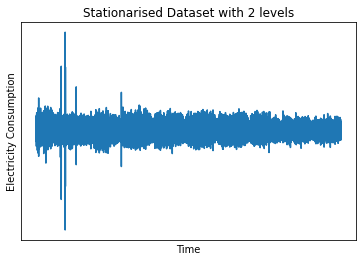

In [ ]:
stationarised_cm2 = [stationarised_cm[i+1]-stationarised_cm[i] for i in range(len(stationarised_cm)-1)]
plt.plot(stationarised_cm2)
plt.xlabel("Time")
plt.ylabel("Electricity Consumption")
plt.title("Stationarised Dataset with 2 levels")
# plt.set_ticklabels([])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False)
plt.show()
plt.show()

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

# l1= consumption_matrix[1000:2000]
# l1.extend(consumption_matrix[2000:3000])
X = stationarised_cm2
result = adfuller(X[:100000])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -68.238505
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [ ]:
train_len = int(0.7 * len(x))
# print(train_len)
x_train = x[:train_len]
x_test = x[train_len:]

y_train = y[:train_len]
y_test = y[train_len:]


In [ ]:
print(len(x_train) , len(x_test) , len(y_train) , len(y_test))

14517 6222 14517 6222


In [ ]:
import numpy as np
y_train = np.array(y_train)
y_test= np.array(y_test)
len(y_train[:,0])

14517

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100 , max_leaf_nodes = 100)
random_forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=100,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
import time
random_forest_models=[]

predictions=[]
actual = []
for i in range(24):
  start_time_h=time.time()
  print(i)
  random_forest = RandomForestRegressor(n_estimators=100 , max_leaf_nodes = 100)
  random_forest.fit(x_train,y_train[:,i])
  predictions.extend(random_forest.predict(x_train))
  predictions.extend(random_forest.predict(x_test))
  actual.extend(y_train[:,i])
  actual.extend(y_test[:,i])

  print("This h took " , time.time()-start_time_h)


  





0
This h took  58.09299564361572
1
This h took  57.852283239364624
2
This h took  58.37361407279968
3
This h took  58.49835801124573
4
This h took  59.110328674316406
5
This h took  59.680607318878174
6
This h took  60.14938735961914
7
This h took  60.07367396354675
8
This h took  60.96028733253479
9
This h took  61.654287815093994
10
This h took  62.28491520881653
11
This h took  62.6940438747406
12
This h took  62.47687578201294
13
This h took  62.65579390525818
14
This h took  63.25352358818054
15
This h took  63.37746238708496
16
This h took  63.4011754989624
17
This h took  63.499491453170776
18
This h took  63.20751881599426
19
This h took  63.603270530700684
20
This h took  64.29012441635132
21
This h took  64.3495466709137
22
This h took  65.4039511680603
23
This h took  63.73010730743408


In [ ]:
print(len(predictions) , len(actual))

497736 497736


In [ ]:
from google.colab import files
h=24
# predictions = l
predictions = np.array(predictions)
predictions = predictions.reshape(h,-1)
df = pd.DataFrame(predictions.T)
print(df.shape)
print(df.head())
df.to_csv('RF_output_96.csv')
files.download('RF_output_96.csv')

(20739, 24)
             0             1   ...            22            23
0  22238.612509  22217.977091  ...  24125.968022  24786.628309
1  29094.055833  28930.262128  ...  27326.386103  27861.748274
2  29197.837535  29064.955438  ...  23990.693567  24035.743558
3  22218.305588  22153.292286  ...  26508.416708  28909.576583
4  29574.046563  30533.796908  ...  34088.352850  35424.670103

[5 rows x 24 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rf_url = 'https://raw.githubusercontent.com/akashdeeps19/stacking-ensemble/master/random_forest_96.csv'
preds = pd.read_csv(rf_url)
preds = preds['0'].values.tolist()

In [ ]:
def mre(actual, pred):
    ans = 0
    for y, y_hat in zip(actual, pred):
        ans += abs(y - y_hat)/y
    return ans/len(actual)

In [ ]:
avg = 0
for i in range(24):
    pred = [preds[j] for j in range(i*y_test.shape[0], (i+1)*y_test.shape[0])]
    actual = y_test[:,i].tolist()
    avg += mre(actual,pred)
avg/24

NameError: ignored

In [ ]:
import tensorflow as tf 
import sklearn
from math import sqrt
def smape(A, F):
    F=np.array(F)
    A=np.array(A)
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def computation_metrics(actual , predicted):
  m = tf.keras.metrics.MeanRelativeError(normalizer=actual)
  m.update_state(actual, predicted)
  print("MRE = ", m.result().numpy())

  mae = tf.keras.losses.MeanAbsoluteError()
  print("Mean absolute error =",mae(actual, predicted).numpy())

  mse = tf.keras.losses.MeanSquaredError()
  print("RMSE = " , sqrt(mse(actual, predicted).numpy()))

  smap = smape(actual , predicted)
  print("SMAPE = ", smap)

  print(" the coefficient of determination = ", sklearn.metrics.r2_score(actual , predicted))

  







In [ ]:
computation_metrics(actual , predictions)

In [ ]:
df = pd.DataFrame(predictions)
df.to_csv('random_forest_96.csv')
files.download('random_forest_96.csv')

In [ ]:

from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_steps = 96

n_features = 1

x_train=np.array(x_train)
x_test= np.array(x_test)

x_train_reshaped = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test_reshaped =  x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [ ]:
x_train_reshaped.shape

(14517, 1, 96)

In [ ]:
x_test_reshaped.shape

(6222, 1, 96)

In [ ]:
import keras
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import numpy
# tensorflow.get_logger().setLevel('ERROR')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
def scale(train, test):

	scaler = MinMaxScaler(feature_range=(-1, 1))
 
	scaler = scaler.fit(train)

	train = train.reshape(train.shape[0], train.shape[1])
 
	train_scaled = scaler.transform(train)

	test = test.reshape(test.shape[0], test.shape[1])
 
	test_scaled = scaler.transform(test)
 
	return scaler , train_scaled, test_scaled

def fit_lstm(train, batch_size, nb_epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  
  X = X.reshape(X.shape[0], 1, X.shape[1])
  y=y.reshape((y.shape[0],1))
  # print(X[0].shape , (1, X.shape[1], X.shape[2]))
  model = Sequential()
  model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
  # model.add(LSTM(100))
  # model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
  # model.add(Dense(128,activation='relu' , input_shape=(96, ) ,  name='Dense_first'))
  # model.add(Dense(100))
  # model.add(Dense(1))
  # model.compile(loss='mean_squared_error', optimizer='adam')
  # model.summary()
  # model.add(Dense(64,activation='relu', name='dense_1'))
  model.add(Dense(16, activation='relu', name='dense_1'))
  model.add(Dense(1, activation='linear', name='dense_output'))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  model.fit(X,y,epochs=1,batch_size=batch_size,verbose=1)

  return model

def model_picture():
  model = Sequential()
  model.add(LSTM(50, batch_input_shape=(1, 96, 1), stateful=True,return_sequences=True))
  # model.add(LSTM(100))
  # model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
  # model.add(Dense(128,activation='relu' , input_shape=(96, ) ,  name='Dense_first'))
  # model.add(Dense(100))
  # model.add(Dense(1))
  # model.compile(loss='mean_squared_error', optimizer='adam')
  # model.summary()
  # model.add(Dense(64,activation='relu', name='dense_1'))
  model.add(Dense(16, activation='relu', name='dense_1'))
  model.add(Dense(1, activation='linear', name='dense_output'))
  # model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  # model.fit(X,y,epochs=1,batch_size=batch_size,verbose=1)
  keras.utils.plot_model(model,to_file='model.png')

model_picture()

def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row ,dtype=object )
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
from google.colab import files
files.download("model.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(np.append(x_train[0] , y_train[:,0][0]))

[28667 28204 27781 27139 26687 26333 27611 27355 27166 26848 26485 26280
 25908 25577 25239 24848 24595 24276 23817 23649 23382 23084 22628 22576
 22198 22091 21945 21740 21420 21217 20975 20901 20592 20814 20707 20536
 20460 20323 20148 20228 20023 19911 19555 19302 19122 19047 19138 19104
 19113 19095 18986 18608 18348 18184 18170 18369 18506 18677 18902 19176
 19388 19766 19964 20227 20456 20756 21105 21251 21177 21410 21634 21843
 21984 22228 22407 22517 22592 22843 23049 23108 23240 23376 23510 23622
 23694 23813 23734 23722 23447 23180 22997 22819 22575 22416 22366 22232
 22291]


In [ ]:
import tensorflow
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import time
tensorflow.get_logger().setLevel('ERROR')

predictions=[]
actual=[]

batch_size=1 
nb_epoch=3
neurons = 100
lstm_model = None
for h in range(24):
  # np.append(x_train[i] , y_train[:,h][i])
  start_time= time.time()
  train = np.array([np.append(x_train[i] , y_train[:,h][i]) for i in range(len(x_train))])
  test = np.array([np.append(x_test[i] , y_test[:,h][i]) for i in range(len(x_test))])

  scaler , train_scaled, test_scaled = scale(train , test)
  # print(train_scaled)
  # break

  lstm_model = fit_lstm(train_scaled, 1, 1, 1)

  X_12 = train_scaled[:,0:-1]
  X_12= X_12.reshape(X_12.shape[0], 1, X_12.shape[1])

  y_hat1 = lstm_model.predict(X_12,batch_size=1)

  X_12 = test_scaled[:,0:-1]
  X_12= X_12.reshape(X_12.shape[0], 1, X_12.shape[1])

  y_hat2=  lstm_model.predict(X_12 , batch_size=1)

  # print(len(y_hat1) , len(y_hat2))

  # for i in range(len(y_hat1))

  # yhat = forecast_lstm(lstm_model , 1 , test_scaled[:, 0:-1])
  # yhat = invert_scale(scaler, test_scaled[:, 0:-1], yhat)
  # predictions.extend(yhat)
  for i in range(len(train_scaled)):
    X_1,y_1 = train_scaled[i, 0:-1], train_scaled[i, -1]
    # yhat = forecast_lstm(lstm_model, 1, X_1)
    yhat = y_hat1[i]
    yhat = invert_scale(scaler, X_1, yhat)
    # print(yhat)
    predictions.append(yhat)

  for i in range(len(x_test)):
    X_1, y_1 = test_scaled[i, 0:-1], test_scaled[i, -1]
    # print(X)
    # print(i+1, end=" ")
    # yhat = forecast_lstm(lstm_model, 1, X_1)
    yhat = y_hat2[i]
    yhat = invert_scale(scaler, X_1, yhat)
    # print(yhat)
    predictions.append(yhat)

  actual.extend(y_test[:,h])

  print(f"This h={h+1} took " , time.time()-start_time , " seconds")


14517/14517 [==============================] - 33s 2ms/step - loss: 0.0393 - mae: 0.1363
This h=1 took  54.58376407623291  seconds
14517/14517 [==============================] - 33s 2ms/step - loss: 0.0296 - mae: 0.1204
This h=2 took  53.88219618797302  seconds
14517/14517 [==============================] - 33s 2ms/step - loss: 0.0369 - mae: 0.1353
This h=3 took  53.745970249176025  seconds
14517/14517 [==============================] - 33s 2ms/step - loss: 0.0339 - mae: 0.1327
This h=4 took  53.60820198059082  seconds
14517/14517 [==============================] - 33s 2ms/step - loss: 0.0370 - mae: 0.1396
This h=5 took  53.889726638793945  seconds
14517/14517 [==============================] - 33s 2ms/step - loss: 0.0542 - mae: 0.1714
This h=6 took  54.460771560668945  seconds
14517/14517 [==============================] - 33s 2ms/step - loss: 0.0453 - mae: 0.1579
This h=7 took  53.535905599594116  seconds
14517/14517 [==============================] - 34s 2ms/step - loss: 0.0485 - ma

In [ ]:
computation_metrics(actual , predictions)

MRE =  0.048368376
Mean absolute error = 1316.857666015625
RMSE =  1764.868479519083
SMAPE =  4.812438894779995
 the coefficient of determination =  0.8517694182105405


In [ ]:
len(actual) , len(predictions)


(6222, 20739)

In [ ]:
# df = pd.DataFrame(predictions)
# df.to_csv('LSTM_96.csv')
# files.download('LSTM_96.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
h=24
# predictions = l
predictions = np.array(predictions)
predictions = predictions.reshape(h,-1)
df = pd.DataFrame(predictions.T)
print(df.shape)
print(df.head())
df.to_csv('LSTM_output_96.csv.csv')
files.download('LSTM_output_96.csv.csv')

(20739, 24)
             0             1   ...            22            23
0  22491.338288  24097.504240  ...  24580.883192  25528.051120
1  28192.227853  30611.470970  ...  29777.804394  29033.905640
2  28043.885227  29192.326045  ...  25128.949156  25617.510620
3  21695.005399  23036.022934  ...  27901.904736  25079.795257
4  28501.045556  29718.989629  ...  30036.623852  26057.237617

[5 rows x 24 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>